<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest_symptom_isolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

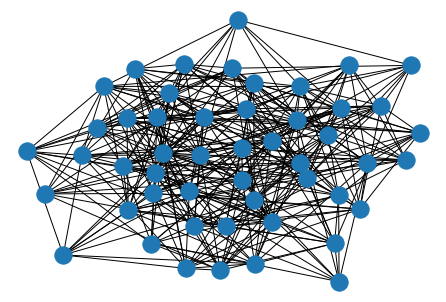

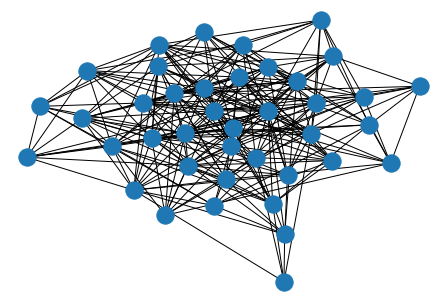

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities
T  = K/5 #Number of test available
PAS = 0.7 #Probability of Asymptomatic
PS = 1 - PAS #Probability of Not Asymptomatic


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 1 0 1]
 [0 1 0 ... 0 1 0]]
[[0 0 0 ... 0 0 1]
 [0 0 1 ... 0 1 0]
 [0 1 0 ... 1 1 1]
 ...
 [0 0 1 ... 0 1 0]
 [0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
    Node[i*NN+j].append({'ISOLATED_S' : 0})
    Node[i*NN+j].append({'ISOLATED_I' : 0})   
print(Node)
print(len(Node))


{0: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 1: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 2: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 3: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 5: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 6: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 7: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 8: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOL

In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1

  Symptom = random.choices([0,1],weights=(PAS,PS), k=1)[0]
  Isolate = 0

  Agent[k].append({'Symptom' : Symptom, 'Isolate' : Isolate})
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom,Isolate]})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom,Isolate], 'C' : 0})
    Agent[k].append({'State' : Rand_state, 'C' : 0 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state]})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
print(Agent)

{0: [{'Viral_load': 0}, {'S': 5}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {2452: [0, 0, 0]}, {5260: [0, 0, 0]}, {5355: [0, 0, 0]}, {6669: [0, 0, 0]}, {8376: [0, 0, 0]}], 1: [{'Viral_load': 0}, {'S': 6}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {2691: [0, 0, 0]}, {5494: [0, 0, 0]}, {7430: [0, 1, 0]}, {7626: [0, 1, 0]}, {8795: [0, 0, 0]}, {9919: [0, 1, 0]}], 2: [{'Viral_load': 0}, {'S': 5}, {'I': 1}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {4282: [0, 0, 0]}, {5090: [0, 0, 0]}, {6151: [1, 1, 0], 'C': 0}, {7400: [0, 0, 0]}, {9362: [0, 0, 0]}, {9562: [0, 0, 0]}], 3: [{'Viral_load': 0}, {'S': 2}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {2295: [0, 0, 0]}, {8363: [0, 0, 0]}], 4: [{'Viral_load': 0}, {'S': 2}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {8792: [0, 0, 0]}, {9371: [0, 0, 0]}], 5: [{'Viral_load': 0}, {'S': 4}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {236: [0, 0, 0]}, {4969: [0, 0, 0]}, {820

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED_S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED_I' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(6,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][2]['Home_node'])
                  neighbors.append(Agent_next[a_id][4]['First_node'])
                  neighbors.append(Agent_next[a_id][6]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][5]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][5]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][7]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][7]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][3]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][3]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][5]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][7]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][3]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.95,.025,.025), k=1)[0]
                      if next == Agent_next[a_id][8]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][4]['First_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][4]['First_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][5]['First_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][5]['First_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][5]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][6]['Second_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][6]['Second_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][7]['Second_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][7]['Second_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][7]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][2]['Home_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][2]['Home_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][3]['Home_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][3]['Home_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][3]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = 3*P1
                        P2 = P2
                        P3 = P3
                      elif max(P1,P2,P3) == P2:
                        P1 = 3*P1
                        P2 = 2*P2
                        P3 = P1
                      else:
                        P1 = 3*P1
                        P2 = P2
                        P3 = 2*P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      #nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      nextn = random.choices(Agent_next[a_id][9]['Current_nodeN'],weights=(.90,.05,.05),k=1)[0]                    
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id][0] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id][0] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['C']+=1
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id][0] == 2:
            Node_next[nex][3]['R']+=1

          if Node[cur][agent][a_id][2] == 1:
            if Node[cur][agent][a_id][0] == 0:
              Node_next[nex][4]['ISOLATED_S']+=1
            elif Node[cur][agent][a_id][0] == 1:
              Node_next[nex][5]['ISOLATED_I']+=1

          
          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        Total = Node_next[i*len(GraphN.nodes)+j][1]['S'] - Node_next[i*len(GraphN.nodes)+j][4]['ISOLATED_S'] + Node_next[i*len(GraphN.nodes)+j][2]['I'] - Node_next[i*len(GraphN.nodes)+j][5]['ISOLATED_I'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] + 1
        W1 = (Node_next[i*len(GraphN.nodes)+j][2]['I'] - Node_next[i*len(GraphN.nodes)+j][5]['ISOLATED_I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load'])/Total
        W2 = (Node_next[i*len(GraphN.nodes)+j][1]['S'] - Node_next[i*len(GraphN.nodes)+j][4]['ISOLATED_S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1)/Total
        for agent in list(range(6,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'C' : 0})
              Agent_next[a_id][1]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['C'] == 4:   #Time-steps of 4 to get cured(I -> R)
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
              count_IR+=1
              Agent_next[a_id][1]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 

    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(6,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id][1] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 0:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 1
            elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 1     
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  count_ISOLATED_S=0
  count_ISOLATED_I=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    count_ISOLATED_S+=Node[i][4]['ISOLATED_S']
    count_ISOLATED_I+=Node[i][5]['ISOLATED_I']
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,count_ISOLATED_S,count_ISOLATED_I,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][1]['State'] == 0:
      count_S+=1
    elif Agent[i][1]['State'] == 1:
      count_I+=1
    elif Agent[i][1]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9836, 9655, 9270, 8878, 8364, 7798, 7075, 6219, 5368, 4465, 3623, 2862, 2269, 1798, 1493, 1279, 1098, 968, 860, 790, 737, 691, 656, 639, 625, 616, 608, 603, 598, 595, 593, 592, 592, 592, 592, 592]
[164, 345, 730, 1122, 1472, 1857, 2195, 2659, 2996, 3333, 3452, 3357, 3099, 2667, 2130, 1583, 1171, 830, 633, 489, 361, 277, 204, 151, 112, 75, 48, 36, 27, 21, 15, 11, 6, 3, 1, 0]
[0, 0, 0, 0, 164, 345, 730, 1122, 1636, 2202, 2925, 3781, 4632, 5535, 6377, 7138, 7731, 8202, 8507, 8721, 8902, 9032, 9140, 9210, 9263, 9309, 9344, 9361, 9375, 9384, 9392, 9397, 9402, 9405, 9407, 9408]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9836, 9655, 9270, 8878, 8364, 7798, 7075, 6219, 5368, 4465, 3623, 2862, 2269, 1798, 1493, 1279, 1098, 968, 860, 790, 737, 691, 656, 639, 625, 616, 608, 603, 598, 595, 593, 592, 592, 592, 592, 592]]
[[], [164, 345, 730, 1122, 1472, 18

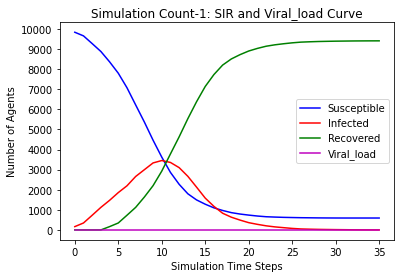

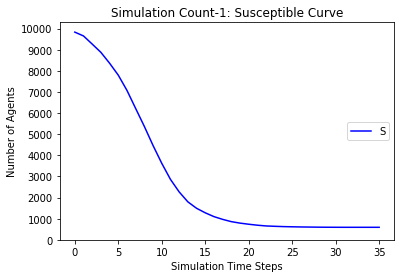

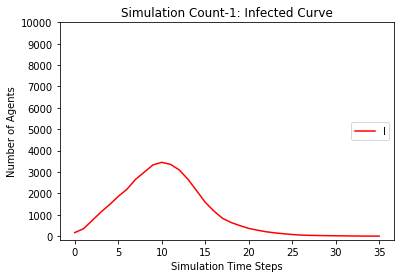

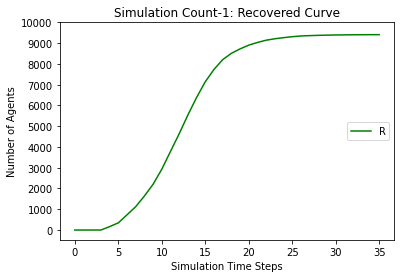

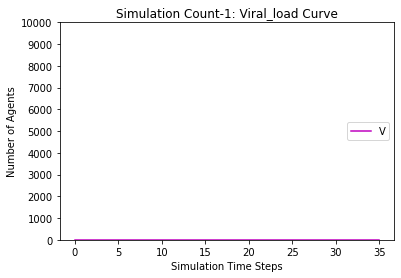

[9836, 9659, 9281, 8870, 8384, 7838, 7182, 6440, 5575, 4693, 3885, 3140, 2482, 1967, 1600, 1278, 1018, 861, 740, 674, 623, 585, 567, 554, 549, 539, 533, 528, 526, 520, 520, 518, 518, 517, 517, 516, 515, 515, 514, 514, 514, 514, 514]
[164, 341, 719, 1130, 1452, 1821, 2099, 2430, 2809, 3145, 3297, 3300, 3093, 2726, 2285, 1862, 1464, 1106, 860, 604, 395, 276, 173, 120, 74, 46, 34, 26, 23, 19, 13, 10, 8, 3, 3, 2, 3, 2, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 164, 341, 719, 1130, 1616, 2162, 2818, 3560, 4425, 5307, 6115, 6860, 7518, 8033, 8400, 8722, 8982, 9139, 9260, 9326, 9377, 9415, 9433, 9446, 9451, 9461, 9467, 9472, 9474, 9480, 9480, 9482, 9482, 9483, 9483, 9484, 9485, 9485, 9486]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9836, 9655, 9270, 8878, 8364, 7798, 7075, 6219, 5368, 4465, 3623, 2862, 2269, 1798, 1493, 1279, 1098

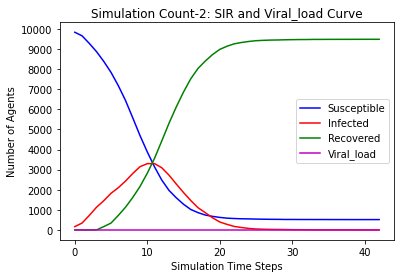

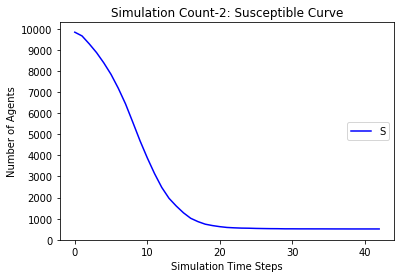

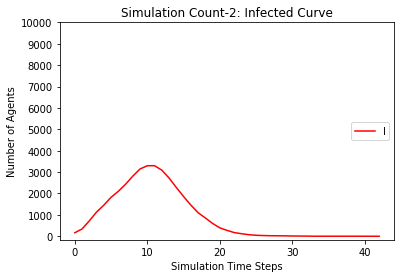

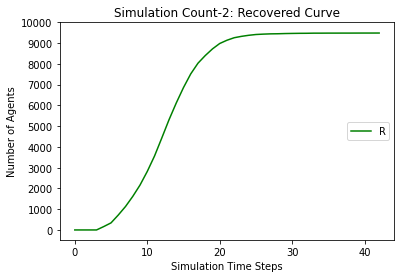

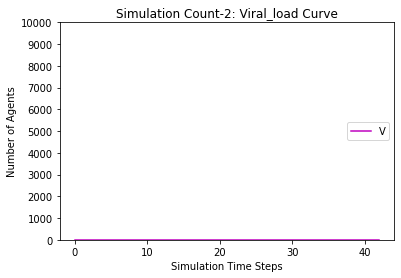

[9836, 9670, 9362, 8950, 8464, 7935, 7332, 6658, 5930, 5159, 4395, 3723, 3117, 2577, 2127, 1768, 1496, 1306, 1145, 1041, 979, 934, 888, 866, 842, 827, 812, 804, 800, 795, 789, 788, 787, 786, 785, 785, 785, 785, 784, 783, 783, 783, 783, 783]
[164, 330, 638, 1050, 1372, 1735, 2030, 2292, 2534, 2776, 2937, 2935, 2813, 2582, 2268, 1955, 1621, 1271, 982, 727, 517, 372, 257, 175, 137, 107, 76, 62, 42, 32, 23, 16, 13, 9, 4, 3, 2, 1, 1, 2, 2, 2, 1, 0]
[0, 0, 0, 0, 164, 330, 638, 1050, 1536, 2065, 2668, 3342, 4070, 4841, 5605, 6277, 6883, 7423, 7873, 8232, 8504, 8694, 8855, 8959, 9021, 9066, 9112, 9134, 9158, 9173, 9188, 9196, 9200, 9205, 9211, 9212, 9213, 9214, 9215, 9215, 9215, 9215, 9216, 9217]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9836, 9655, 9270, 8878, 8364, 7798, 7075, 6219, 5368, 4465, 3623, 2862, 226

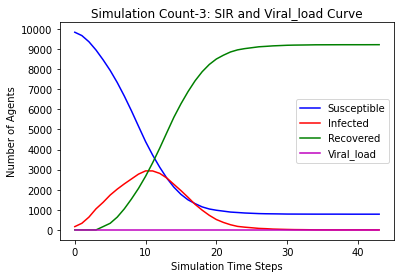

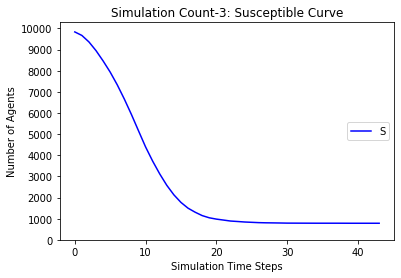

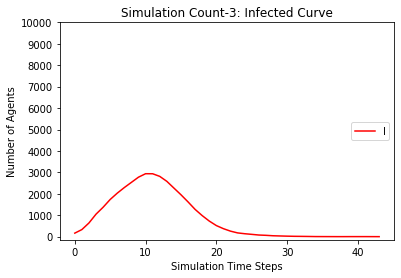

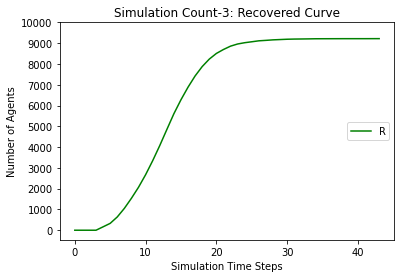

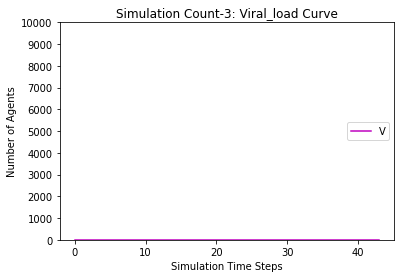

[9836, 9672, 9325, 8898, 8444, 7904, 7281, 6580, 5769, 4965, 4124, 3447, 2814, 2245, 1813, 1477, 1239, 1064, 925, 834, 766, 713, 678, 659, 638, 623, 609, 604, 599, 595, 592, 590, 590, 590, 590, 589, 588, 588, 588, 588, 588]
[164, 328, 675, 1102, 1392, 1768, 2044, 2318, 2675, 2939, 3157, 3133, 2955, 2720, 2311, 1970, 1575, 1181, 888, 643, 473, 351, 247, 175, 128, 90, 69, 55, 39, 28, 17, 14, 9, 5, 2, 1, 2, 2, 2, 1, 0]
[0, 0, 0, 0, 164, 328, 675, 1102, 1556, 2096, 2719, 3420, 4231, 5035, 5876, 6553, 7186, 7755, 8187, 8523, 8761, 8936, 9075, 9166, 9234, 9287, 9322, 9341, 9362, 9377, 9391, 9396, 9401, 9405, 9408, 9410, 9410, 9410, 9410, 9411, 9412]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9836, 9655, 9270, 8878, 8364, 7798, 7075, 6219, 5368, 4465, 3623, 2862, 2269, 1798, 1493, 1279, 1098, 968, 860, 790, 737, 691, 656, 639,

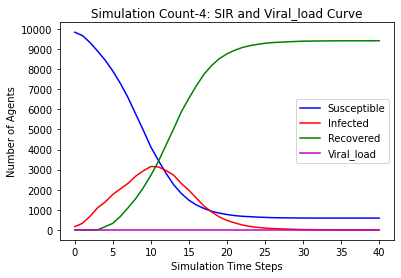

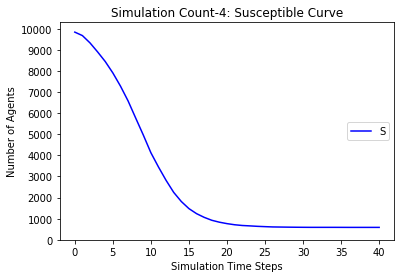

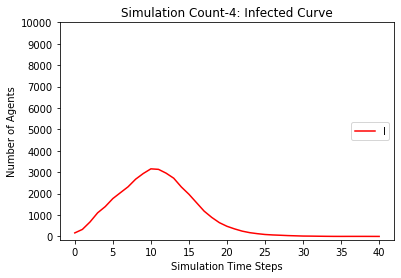

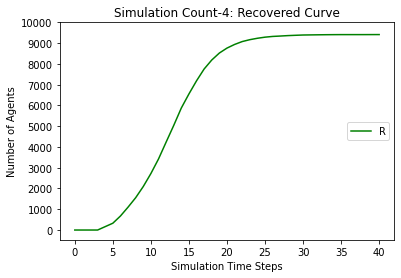

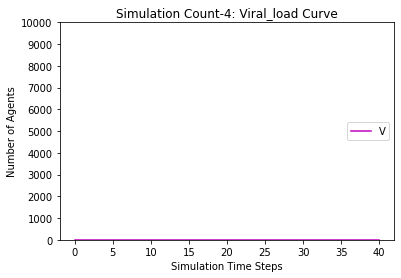

[9836, 9683, 9297, 8830, 8329, 7774, 7061, 6346, 5550, 4756, 3987, 3288, 2651, 2141, 1729, 1449, 1226, 1060, 941, 847, 802, 771, 741, 726, 708, 699, 691, 687, 684, 681, 679, 673, 671, 668, 667, 666, 666, 665, 661, 661, 661, 661, 661]
[164, 317, 703, 1170, 1507, 1909, 2236, 2484, 2779, 3018, 3074, 3058, 2899, 2615, 2258, 1839, 1425, 1081, 788, 602, 424, 289, 200, 121, 94, 72, 50, 39, 24, 18, 12, 14, 13, 13, 12, 7, 5, 3, 6, 5, 5, 4, 0]
[0, 0, 0, 0, 164, 317, 703, 1170, 1671, 2226, 2939, 3654, 4450, 5244, 6013, 6712, 7349, 7859, 8271, 8551, 8774, 8940, 9059, 9153, 9198, 9229, 9259, 9274, 9292, 9301, 9309, 9313, 9316, 9319, 9321, 9327, 9329, 9332, 9333, 9334, 9334, 9335, 9339]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9836, 9655, 9270, 8878, 8364, 7798, 7075, 6219, 5368, 4465, 3623, 2862, 2269, 1798, 1493, 1279, 

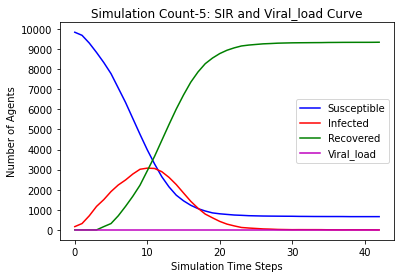

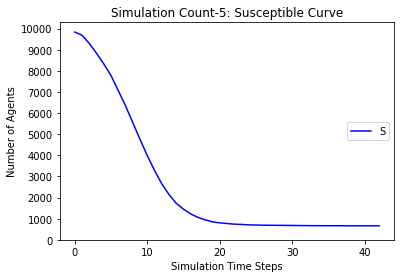

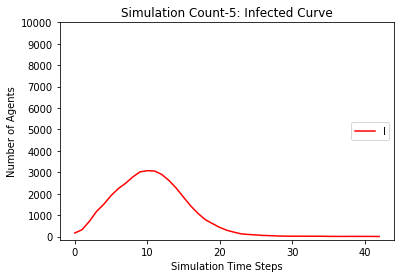

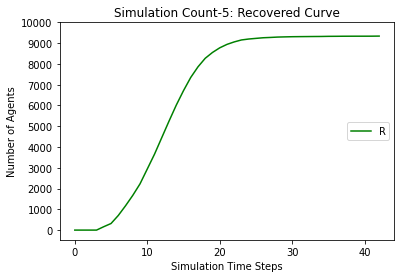

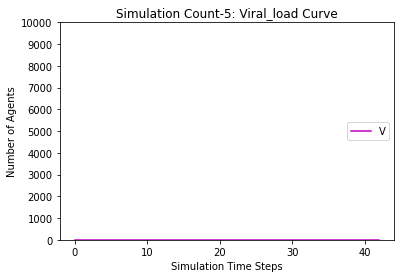

[9836, 9677, 9350, 8938, 8478, 7978, 7385, 6676, 5927, 5121, 4312, 3558, 2877, 2347, 1890, 1556, 1307, 1129, 992, 907, 848, 804, 775, 749, 730, 720, 714, 710, 708, 705, 703, 703, 703, 703, 703]
[164, 323, 650, 1062, 1358, 1699, 1965, 2262, 2551, 2857, 3073, 3118, 3050, 2774, 2422, 2002, 1570, 1218, 898, 649, 459, 325, 217, 158, 118, 84, 61, 39, 22, 15, 11, 7, 5, 2, 0]
[0, 0, 0, 0, 164, 323, 650, 1062, 1522, 2022, 2615, 3324, 4073, 4879, 5688, 6442, 7123, 7653, 8110, 8444, 8693, 8871, 9008, 9093, 9152, 9196, 9225, 9251, 9270, 9280, 9286, 9290, 9292, 9295, 9297]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9836, 9655, 9270, 8878, 8364, 7798, 7075, 6219, 5368, 4465, 3623, 2862, 2269, 1798, 1493, 1279, 1098, 968, 860, 790, 737, 691, 656, 639, 625, 616, 608, 603, 598, 595, 593, 592, 592, 592, 592, 592], [9836, 9659, 9281, 8870, 8384, 7838, 7182, 6440, 5575

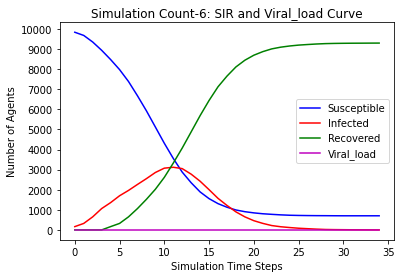

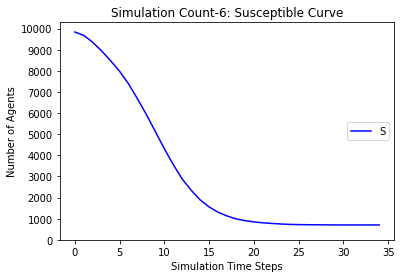

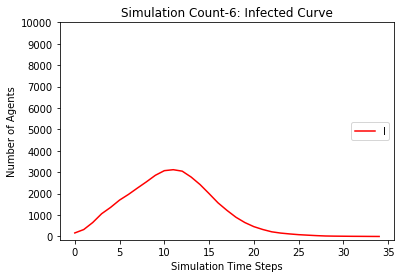

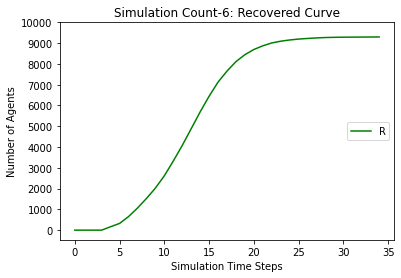

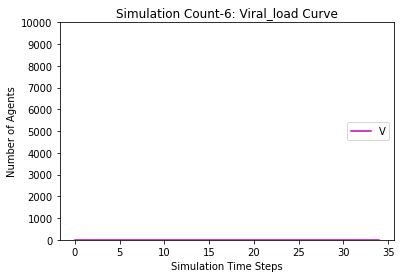

[9836, 9668, 9287, 8851, 8375, 7800, 7170, 6442, 5625, 4818, 4025, 3260, 2590, 2069, 1653, 1375, 1175, 1022, 908, 847, 808, 770, 744, 725, 707, 692, 683, 679, 678, 677, 676, 674, 673, 673, 672, 671, 670, 669, 668, 668, 668, 668, 668]
[164, 332, 713, 1149, 1461, 1868, 2117, 2409, 2750, 2982, 3145, 3182, 3035, 2749, 2372, 1885, 1415, 1047, 745, 528, 367, 252, 164, 122, 101, 78, 61, 46, 29, 15, 7, 5, 5, 4, 4, 3, 3, 4, 4, 3, 2, 1, 0]
[0, 0, 0, 0, 164, 332, 713, 1149, 1625, 2200, 2830, 3558, 4375, 5182, 5975, 6740, 7410, 7931, 8347, 8625, 8825, 8978, 9092, 9153, 9192, 9230, 9256, 9275, 9293, 9308, 9317, 9321, 9322, 9323, 9324, 9326, 9327, 9327, 9328, 9329, 9330, 9331, 9332]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9836, 9655, 9270, 8878, 8364, 7798, 7075, 6219, 5368, 4465, 3623, 2862, 2269, 1798, 1493, 1279, 1098

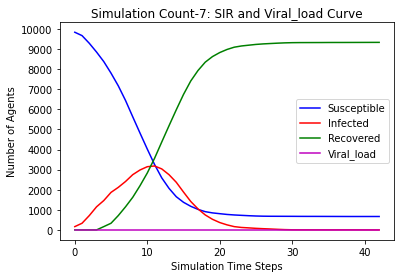

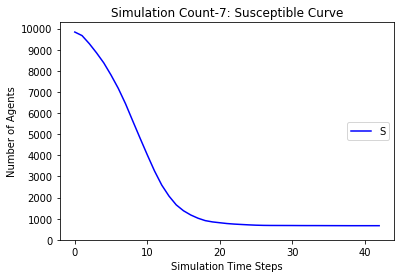

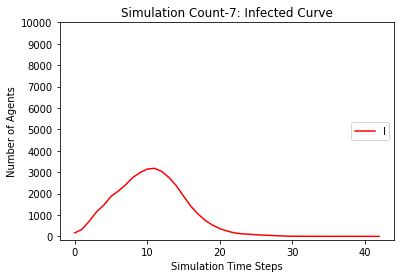

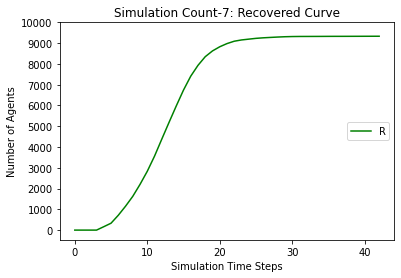

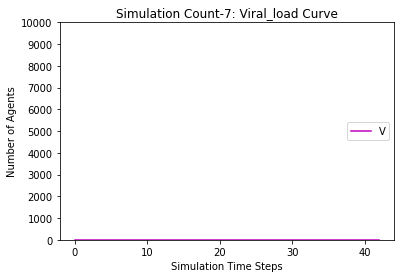

[9836, 9677, 9304, 8865, 8362, 7803, 7171, 6439, 5598, 4757, 3956, 3229, 2594, 2114, 1696, 1373, 1139, 973, 855, 773, 725, 683, 655, 632, 623, 610, 603, 598, 596, 593, 590, 589, 589, 589, 589, 588, 588, 588, 588, 588]
[164, 323, 696, 1135, 1474, 1874, 2133, 2426, 2764, 3046, 3215, 3210, 3004, 2643, 2260, 1856, 1455, 1141, 841, 600, 414, 290, 200, 141, 102, 73, 52, 34, 27, 17, 13, 9, 7, 4, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 164, 323, 696, 1135, 1638, 2197, 2829, 3561, 4402, 5243, 6044, 6771, 7406, 7886, 8304, 8627, 8861, 9027, 9145, 9227, 9275, 9317, 9345, 9368, 9377, 9390, 9397, 9402, 9404, 9407, 9410, 9411, 9411, 9411, 9411, 9412]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9836, 9655, 9270, 8878, 8364, 7798, 7075, 6219, 5368, 4465, 3623, 2862, 2269, 1798, 1493, 1279, 1098, 968, 860, 790, 737, 691, 656, 639, 625, 616, 608, 603, 

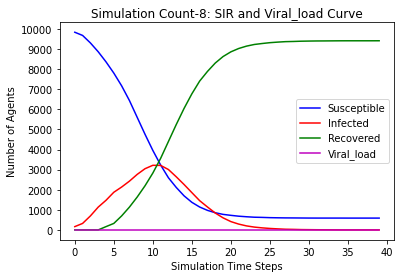

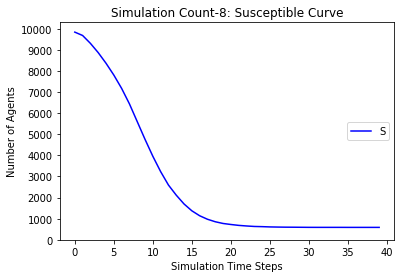

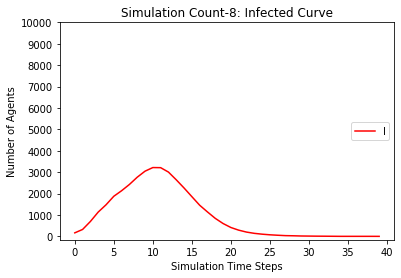

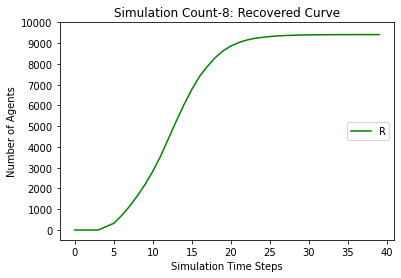

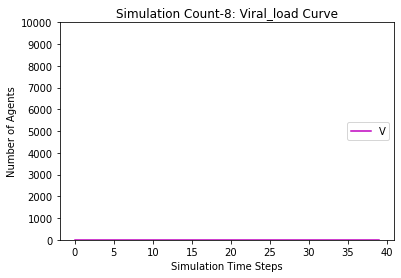

[9836, 9675, 9241, 8797, 8302, 7739, 7020, 6201, 5362, 4564, 3788, 3087, 2505, 2037, 1668, 1379, 1180, 1028, 935, 869, 807, 770, 740, 712, 686, 673, 664, 661, 659, 658, 657, 656, 655, 653, 652, 651, 651, 651, 651, 651]
[164, 325, 759, 1203, 1534, 1936, 2221, 2596, 2940, 3175, 3232, 3114, 2857, 2527, 2120, 1708, 1325, 1009, 733, 510, 373, 258, 195, 157, 121, 97, 76, 51, 27, 15, 7, 5, 4, 5, 5, 5, 4, 2, 1, 0]
[0, 0, 0, 0, 164, 325, 759, 1203, 1698, 2261, 2980, 3799, 4638, 5436, 6212, 6913, 7495, 7963, 8332, 8621, 8820, 8972, 9065, 9131, 9193, 9230, 9260, 9288, 9314, 9327, 9336, 9339, 9341, 9342, 9343, 9344, 9345, 9347, 9348, 9349]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9836, 9655, 9270, 8878, 8364, 7798, 7075, 6219, 5368, 4465, 3623, 2862, 2269, 1798, 1493, 1279, 1098, 968, 860, 790, 737, 691, 656, 639, 625, 616, 608, 603, 

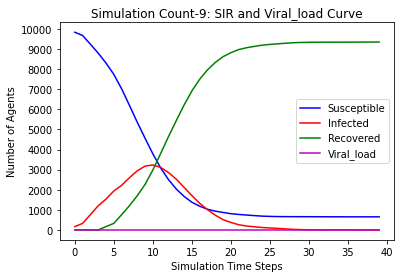

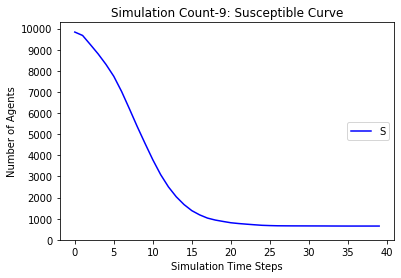

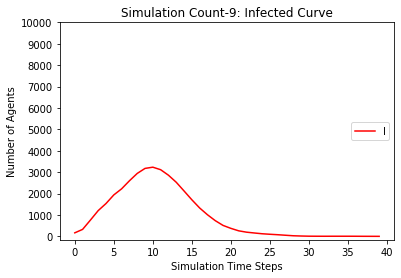

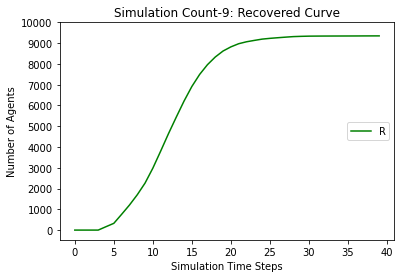

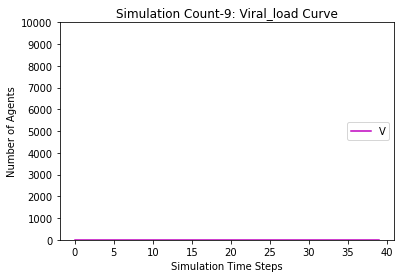

[9836, 9664, 9292, 8856, 8364, 7767, 7110, 6306, 5471, 4621, 3816, 3084, 2449, 1942, 1521, 1232, 1024, 877, 767, 712, 671, 632, 608, 593, 580, 571, 564, 558, 556, 552, 551, 551, 551, 551, 551]
[164, 336, 708, 1144, 1472, 1897, 2182, 2550, 2893, 3146, 3294, 3222, 3022, 2679, 2295, 1852, 1425, 1065, 754, 520, 353, 245, 159, 119, 91, 61, 44, 35, 24, 19, 13, 7, 5, 1, 0]
[0, 0, 0, 0, 164, 336, 708, 1144, 1636, 2233, 2890, 3694, 4529, 5379, 6184, 6916, 7551, 8058, 8479, 8768, 8976, 9123, 9233, 9288, 9329, 9368, 9392, 9407, 9420, 9429, 9436, 9442, 9444, 9448, 9449]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9836, 9655, 9270, 8878, 8364, 7798, 7075, 6219, 5368, 4465, 3623, 2862, 2269, 1798, 1493, 1279, 1098, 968, 860, 790, 737, 691, 656, 639, 625, 616, 608, 603, 598, 595, 593, 592, 592, 592, 592, 592], [9836, 9659, 9281, 8870, 8384, 7838, 7182, 6440, 5575, 

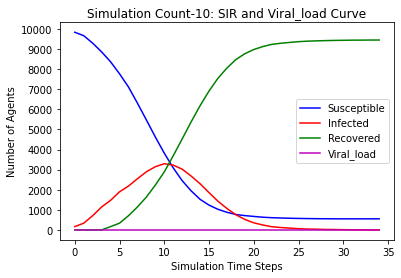

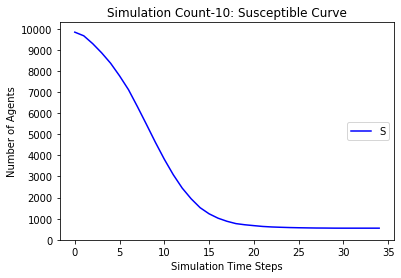

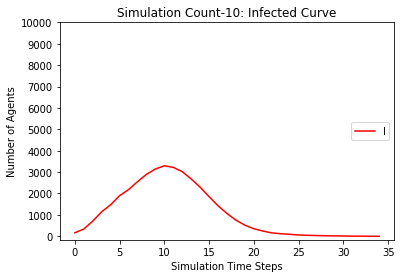

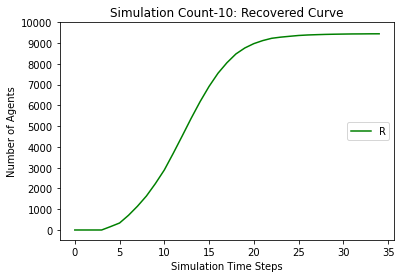

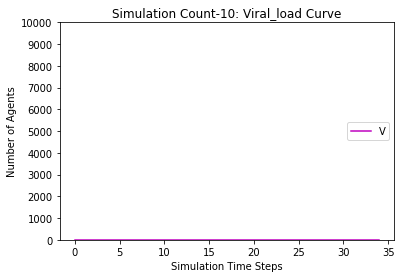

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,ISOLATED_Sj,ISOLATED_Ij,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj >= 1 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,ISOLATED_Sj,ISOLATED_Ij,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

Susceptible Average (100 Simulations): [9836, 9674.7734375, 9273.58984375, 8833.96875, 8342.015625, 7783.3828125, 7107.95703125, 6335.33984375, 5506.71484375, 4695.84375, 3908.3203125, 3189.765625, 2574.28515625, 2089.13671875, 1693.80859375, 1394.03515625, 1180.9375, 1022.66015625, 915.8046875, 843.6640625, 788.7421875, 749.765625, 720.65234375, 695.84765625, 676.0078125, 663.05078125, 654.66015625, 650.85546875, 648.875, 647.08203125, 645.41796875, 644.1796875, 643.484375, 642.37890625, 641.71484375]
Infected Average(100 Simulations): [164, 325.2265625, 726.41015625, 1166.03125, 1493.984375, 1891.390625, 2165.6328125, 2498.62890625, 2835.30078125, 3087.5390625, 3199.63671875, 3145.57421875, 2932.4296875, 2606.70703125, 2214.51171875, 1795.73046875, 1393.34765625, 1066.4765625, 778.00390625, 550.37109375, 392.1953125, 272.89453125, 195.15234375, 147.81640625, 112.734375, 86.71484375, 65.9921875, 44.9921875, 27.1328125, 15.96875, 9.2421875, 6.67578125, 5.390625, 4.703125, 3.703125]
Rec

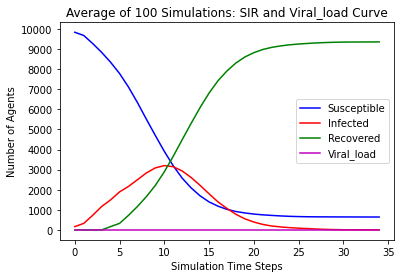

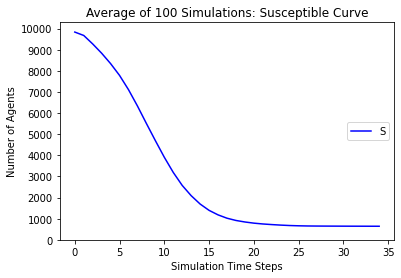

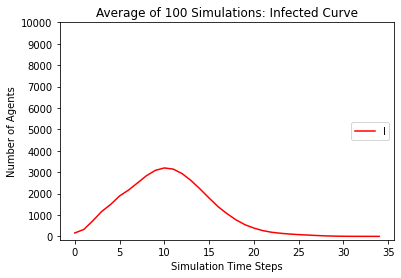

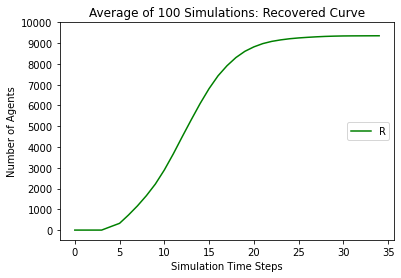

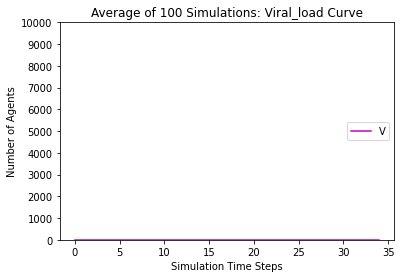

In [11]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

print("Susceptible Average (100 Simulations):", SC)
print("Infected Average(100 Simulations):", IC)
print("Recovered Average(100 Simulations):", RC)
print("Viral_load Average(100 Simulations):", VT) 
print("Time Steps:", TC) 



plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
